<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<b>Станислав, привет!</b>

Меня зовут Владимир Бердников, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это не совсем удобно для тебя — дай знать, и мы перейдем на "вы". Моя цель не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь улучшить навыки. 
    
Пожалуйста, не перемещай, не удаляй и не правь мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

При проверке работы я буду отмечать комментарии цветом и примечанием. В конце заголовка комментария указан номер итерации проверки.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Комментарии такого цвета нужно исправить, иначе проект не будет принят. 
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Такой комментарий является рекомендацией или советом. Mожешь учесть их при выполнении задания.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Так выделены все остальные комментарии, включая позитивные моменты, пояснения и рассуждения.
</div>  
    
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте — пиши об этом в комментариях, например, с помощью такого кода в markdown ячейке:

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Ок.   

# Проект 3: Статистический анализ данных

## План

1. Загрузить данные и получить общую информацию о таблицах
2. Обработать сырые данные: 
    1) найти пропуски, если они есть
    2) обработать дубликаты в данных
3. Провести исследовательский анализ данных:
    1) убрать из выборки редкие значения, которые могут приводить к выбросам;
    2) найти частоту встречаемости городов
    3) определить соотношение пользователей с подпиской и без
    4) исследовать информацию о возрасте пользователей
    5) найти среднее растстояние, которое пользователь проезжает за 1 поездку
    6) найти среднюю продолжительность поездок
4. Обьеденить таблицы:
    1) обьеденить все таблицы в одну
    2) создать две дополнительные таблицы: пользователи с подпиской и без
    3) визуализировать информацию для обеих категорий
5. Подсчитать выручку:
    1) создать датафрейм с агрегированными данными
    2) подсчитать помесячную выручку приносимую каждым клиентом
6. Проверить следующие гипотизы:
    1) тратят ли пользователи с подпиской больше времени на поездки чем пользователи без подписок
    2) превышает ли среднее расстояние пользователей с подпиской 3130
    3) будет ли помесячная выручка от пользователей с подпиской выше чем у пользователей без подписки
7. Решить задачи на распределения
8. Написать общий вывод

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Стоит еще добавить описание проекта.

## Загрузка данных

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Переместил импорт в начало 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    users_data = pd.read_csv('../datasets/users_go.csv')
except:
    users_data = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
try:
    rides_data = pd.read_csv('../datasets/rides_go.csv')
except:
    rides_data = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
try:
    subscriptions_data = pd.read_csv('../datasets/subscriptions_go.csv')
except:
    subscriptions_data = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [3]:
display(users_data.head(10))
display(subscriptions_data.head(10))
display(rides_data.head(10))

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [4]:
display(users_data.info())
display(rides_data.info())
display(subscriptions_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Добавил вывод. 

* В таблице rides_go.csv 18068 записей, пропусков не видно, следует изменить тип колонки с датой на datetime.
* В таблице users_go.scv 1565 записей, пропусков не видно, типы в порядке.
* В таблице subscriptions_go всего 2 записи, пропусков нет, типы в порядке.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Подготовка промежуточных выводов также является частью работы над проектом. Нужно изучить данные по всем таблицам с помощью метода info() и написать выводы, сколько записей в таблицах, какие в них есть типы данных, требуется ли изменение типов данных.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Принято

## Предобработка данных

### Изменение типов столбцов

In [5]:
rides_data['date'] = pd.to_datetime(rides_data['date'], format='%Y-%m-%d')
display(rides_data.head())
rides_data.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [6]:
rides_data['month'] = rides_data['date'].dt.month
rides_data.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Вывел период, за который имеются данные.

In [7]:
display(rides_data['date'].min())
display(rides_data['date'].max())

Timestamp('2021-01-01 00:00:00')

Timestamp('2021-12-30 00:00:00')

Имеются данные за 1 год.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Желательно еще проверить, за какой период имеются данные. Создается столбец с номерами месяцев, если здесь несколько лет, следует это учитывать.

### Работа с дубликатами

In [8]:
display(users_data.duplicated().sum())
rides_data.duplicated().sum()

31

0

Удалены явные дубликаты в таблице users_go. Есть дубликаты людей с разными id (совпадают поля имя, возраст, город, тип подписки. Такиз дубликатов 27), однако людей с разными id, будем считать разными людьми.

In [9]:
users_data = users_data.drop_duplicates().reset_index(drop=True)
display(users_data.duplicated().sum())
users_data.info()

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


In [10]:
users_data.loc[:,'name':'subscription_type'].duplicated().sum()

27

### Проверка на пропуски

In [11]:
users_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [12]:
rides_data.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [13]:
display(users_data['name'].unique())
display(users_data['city'].unique())
display(users_data['subscription_type'].unique())

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

array(['ultra', 'free'], dtype=object)

Кроме дубликатов в таблице users_go проблем в данных не найдено.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Хорошо, проверены пропуски и дубликаты; удалены выявленные дубликаты 

## Исследовательский анализ данных

### Выявление выбросов

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Убрал удаление данных. Таблицы rides_data_new и users_data_new были переименованы без _new.

In [14]:
(
    users_data['age']
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
)

0.0012    12.0000
0.0100    14.0000
0.5000    25.0000
0.9900    35.0000
0.9988    38.1604
Name: age, dtype: float64

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Здесь были удалены данные по пользователям. А приносили ли компании они выручку? Если да, то правильно ли отказываться от денег, которые платят за услугу? 
    

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ +

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Дополнительно можно посмотреть, есть ли в столбце с продолжительностью сессии аномалии. Можно сравнить продолжительность сессий и расстояние поездок и прокомментировать, насколько реально можно проехать такое расстояние за указанное время. В случае обнаружения удалять не рекомендуется, лучше сначала выяснить причину их появления.

In [15]:
(
    rides_data[['distance', 'duration']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,distance,duration
0.0012,36.38,0.50
0.01,208.08,3.98
0.5,"3,133.61",17.68
0.99,"5,478.62",32.50
0.9988,"6,251.50",35.43


In [16]:
rides_data[(rides_data['duration'] >= 35.4)].loc[:,['duration', 'distance']].style.format("{:,.2f}")

,duration,distance
42,35.90,"4,649.49"
143,38.13,"4,187.62"
499,36.91,"4,151.08"
524,35.82,"4,763.92"
1455,35.80,"3,967.29"
1621,35.77,"3,794.40"
1694,36.40,"4,473.80"
1894,36.31,"4,218.39"
1998,38.35,"4,831.34"
2232,35.57,"4,262.35"


In [17]:
rides_data[(rides_data['distance'] >= 6250)].loc[:,['duration', 'distance']].style.format("{:,.2f}")

,duration,distance
7043,25.97,"6,386.94"
7635,28.98,"6,395.40"
7830,0.50,"6,262.30"
7913,16.85,"6,427.05"
8527,34.75,"6,436.63"
9288,19.86,"6,251.73"
9756,26.75,"6,251.39"
10341,27.30,"6,671.97"
10663,27.15,"6,383.04"
10915,30.01,"6,535.39"


In [18]:
rides_data[(rides_data['distance'] <= 36.4)].loc[:,['duration', 'distance']].style.format("{:,.2f}")

,duration,distance
6611,14.14,28.79
6691,2.05,23.96
6850,3.17,30.47
7389,7.09,35.06
7841,10.03,7.10
8324,4.03,12.23
8658,6.02,6.78
8906,2.04,11.28
9128,8.08,31.80
9541,3.01,2.57


In [19]:
rides_data[(rides_data['duration'] <= .5)].loc[:,['duration', 'distance']].style.format("{:,.2f}")

,duration,distance
6531,0.50,"4,196.45"
6570,0.50,"4,830.82"
6680,0.50,"4,684.00"
6695,0.50,"5,215.64"
6768,0.50,"5,197.44"
6860,0.50,"6,225.52"
6883,0.50,"4,452.49"
7018,0.50,"4,406.95"
7160,0.50,"5,286.17"
7364,0.50,"4,881.39"


Среди редких данных в таблице rides_data найдены аномалии (слишком большое расстояние от 4000м поездки при слишком маленькой длительности 0.5мин). Скорее всего такие аномалии произошли в результате технического сбоя оборудования.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Аналогично комментарию выше

### Часота встречаемости городов

Text(0.5, 0, 'Количество заказов')

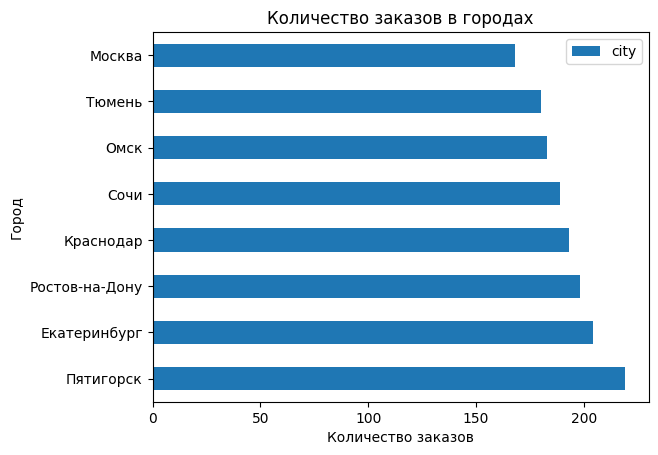

In [20]:
users_data['city'].value_counts()\
    .to_frame()\
    .plot(kind='barh', title='Количество заказов в городах', ylabel='Город')\
    .set_xlabel('Количество заказов')

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Не хватает подписей на осях.
    
Замечание касается всех визуализаций.

In [21]:
users_data['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

### Соотношение пользователей с подпиской и без

Отношение количества пользователей с разными топом подписки к общему количеству пользователей.

In [22]:
display(users_data['subscription_type'].value_counts()[0] / users_data['subscription_type'].value_counts()[1])
display(users_data['subscription_type'].value_counts()[0] / users_data['subscription_type'].count())
users_data['subscription_type'].value_counts()[1] / users_data['subscription_type'].count()

1.1945636623748213

0.5443285528031291

0.4556714471968709

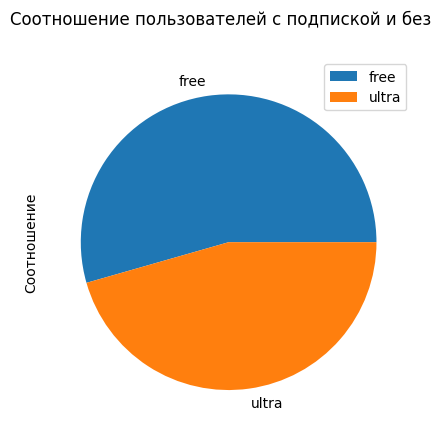

In [23]:
users_data['subscription_type'].value_counts()\
    .to_frame()\
    .plot(kind='pie', title='Соотношение пользователей с подпиской и без', subplots=True, ylabel='Соотношение');

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Здесь подошла бы круговая диаграмма, с ее помощью можно показать соотношение двух категорий в процентах. О том, как подписывать диаграмму, есть в документации по [ссылке](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)

Пользователей с подпиской примерно на 20% меньше чем без подписки.

### Возраст пользователей

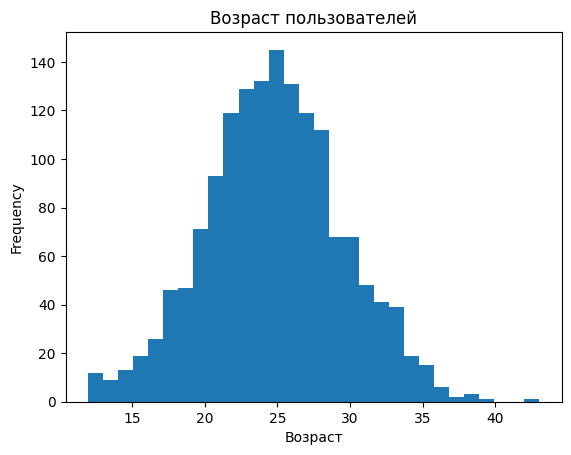

In [24]:
users_data['age']\
    .plot(kind='hist', bins=30, title='Возраст пользователей', ylabel='Количество пользователей')\
    .set_xlabel('Возраст');

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Лучше построить гистограмму вместо столбчатой диаграммы, чтобы показать распределение по возрасту

In [25]:
users_data['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Половина пользователей имеют возраст от 22 до 28 лет, средний возраст примерно 25 лет.

### Расстояние и продолжительность поездок

In [26]:
rides_users = rides_data.pivot_table(index='user_id', values=['distance', 'duration'], aggfunc=['count', 'mean', 'median'])
rides_users.columns = ['count', 'count1', 'mean_distance', 'mean_duration', 'median_distance', 'median_duration']
rides_users = rides_users.drop('count1', axis=1)
rides_users

,count,mean_distance,mean_duration,median_distance,median_duration
user_id,,,,,
1,12,2839.181839,17.050409,2806.504429,16.233505
2,11,3087.641692,17.967662,3105.086678,18.779128
3,12,3075.633155,19.432793,2858.693148,19.835873
4,14,3202.656423,20.611684,3373.276987,20.723324
5,11,3232.449968,15.824903,3244.021903,14.904990
...,...,...,...,...,...
1530,17,2750.498225,17.198049,2724.331740,16.207316
1531,23,2915.425836,17.747487,2999.913238,18.308701
1532,13,2607.861784,16.320011,2615.477834,14.846434


count    1534.000000
mean     3134.108236
std       346.362860
min      1234.763317
25%      2916.315439
50%      3131.071202
75%      3337.730942
max      4395.430303
Name: median_distance, dtype: float64

<AxesSubplot:>

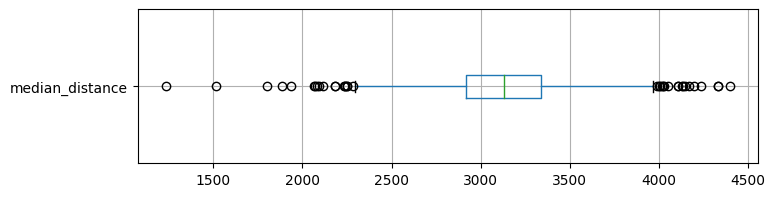

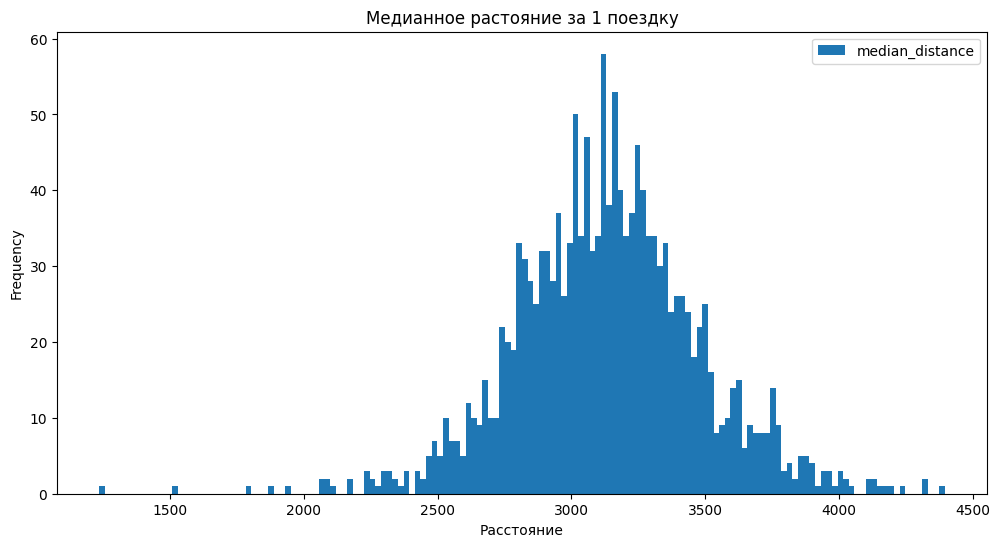

In [27]:
display(rides_users['median_distance'].describe());
display(rides_users.boxplot(column='median_distance', vert=False, figsize=(8,2)));
rides_users.plot(y='median_distance', kind='hist', bins=150, figsize=(12,6), title='Медианное растояние за 1 поездку').set_xlabel('Расстояние');

count    1534.000000
mean       17.727225
std         2.322542
min        10.711378
25%        16.189955
50%        17.743728
75%        19.208337
max        29.983174
Name: median_duration, dtype: float64

<AxesSubplot:>

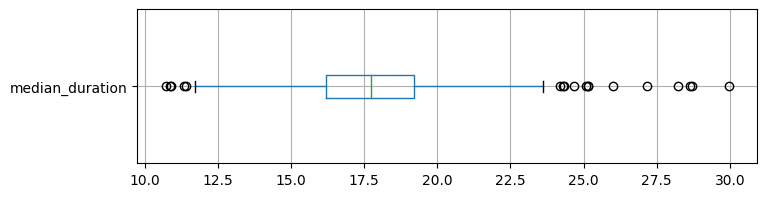

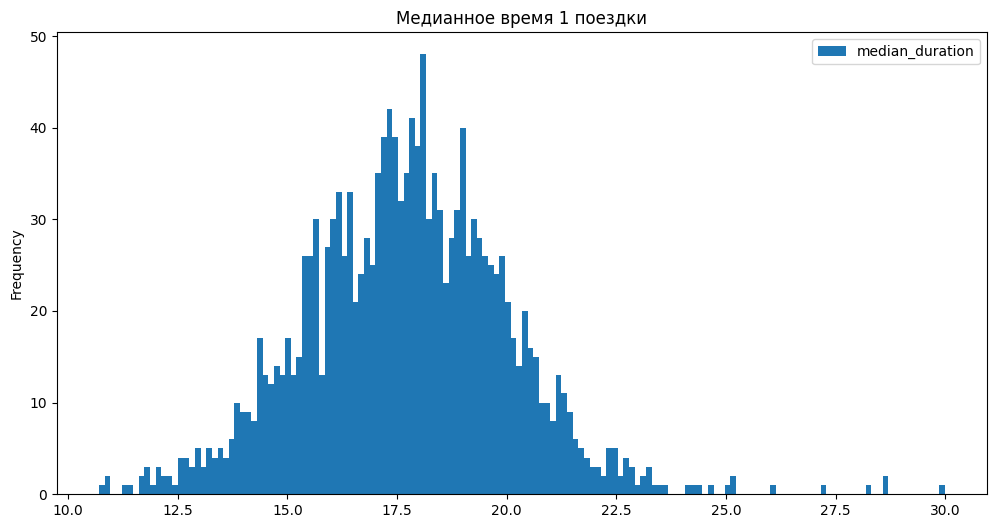

In [28]:
display(rides_users['median_duration'].describe());
display(rides_users.boxplot(column='median_duration', vert=False, figsize=(8,2)));
rides_users.plot(y='median_duration', kind='hist', bins=150, figsize=(12,6), title='Медианное время 1 поездки');

Графики напоминают распределение Пуассона. Даже после отсечения редких значений составляющих меньше 1% выборки видны выбросы.

## Обьеденение данных

### Обьеденение всех таблиц в одну 

In [29]:
all_data = rides_data.merge(users_data, on='user_id', how='right')
all_data = all_data.merge(subscriptions_data, on='subscription_type', how='inner')
all_data.head(20)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Добавил проверку после обьединения таблиц.

In [30]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


Постле обьединения лишних записей не появилось, пропусков не обнаружено.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ После объединения стоит проверить и написать, прошло ли оно корректно, не были ли потеряны данные или не появились ли лишние записи. Совпадает ли количество записей с одной из исходных таблиц? Имеются ли пропуски? Стоит не только объединить данные, но и убедиться, что всё хорошо.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Объединение прошло успешно

### Создание двух дополнительных таблиц: Клиентов с подпиской и без

In [31]:
all_data_free = all_data[all_data['subscription_type'] == 'free']
all_data_ultra = all_data[all_data['subscription_type'] == 'ultra']
display(all_data_free.head(10))
all_data_ultra.head(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0
6505,700,4342.002254,22.368009,2021-02-23,2,Айдар,22,Омск,free,8,50,0
6506,700,3798.334905,18.243756,2021-03-03,3,Айдар,22,Омск,free,8,50,0
6507,700,2984.551206,15.424899,2021-04-09,4,Айдар,22,Омск,free,8,50,0
6508,700,3360.107141,16.765497,2021-06-12,6,Айдар,22,Омск,free,8,50,0
6509,700,2567.543847,11.312160,2021-06-23,6,Айдар,22,Омск,free,8,50,0


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Добавил проверку после создания дополнительных таблиц.

Совокупный размер новых датафреймов совпадает с количеством строк в исходной таблице.

In [32]:
all_data_free['age'].count() + all_data_ultra['age'].count() == all_data['age'].count()

True

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Отлично, созданы необходимые датафреймы. Я бы еще соватовал проверять, что совокупный размер датафреймов совпадает с количеством строк в исходной таблице.

### Визуализация информации для обеих категорий

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_2: <a class="tocSkip"> </h2>

Переделал визуализацию под начальные данные и подправил вывод.

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

<AxesSubplot:>

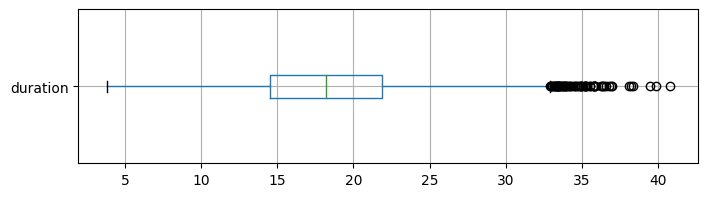

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

<AxesSubplot:>

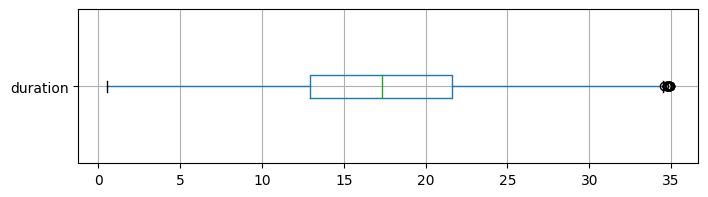

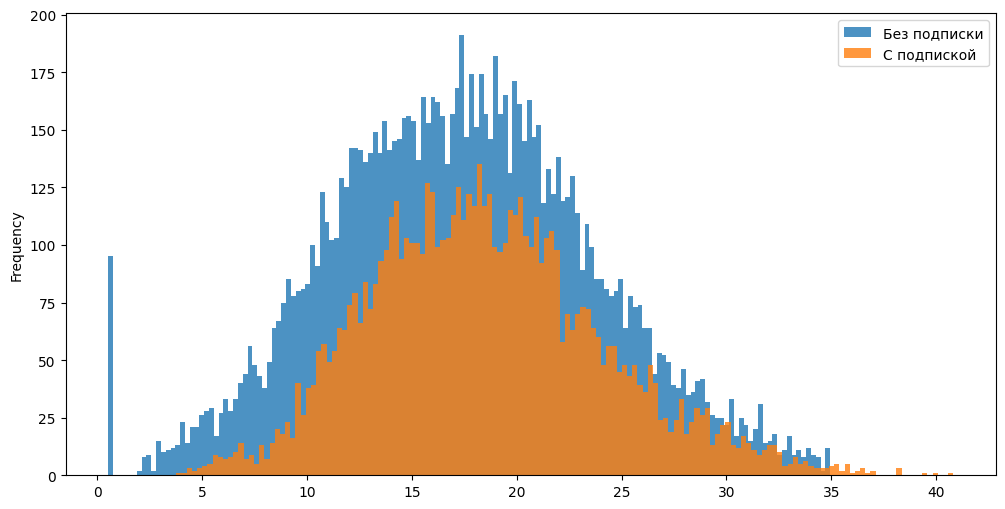

In [33]:
display(all_data_ultra['duration'].describe());
display(all_data_ultra.boxplot(column='duration', vert=False, figsize=(8,2)))
plt.show()
display(all_data_free['duration'].describe());
display(all_data_free.boxplot(column='duration', vert=False, figsize=(8,2)));
ax_hist = all_data_free.plot(y='duration', kind='hist', bins=150, figsize=(12,6), alpha=0.8, label='Без подписки');
all_data_ultra.plot(y='duration', kind='hist', bins=150, figsize=(12,6), ax=ax_hist, alpha=0.8, legend=True, label='С подпиской');

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Лучше для двух датайфреймов строить не отдельные гистограммы, а совместить их в одной визуализации. В итоге, получится одна визуализация, показывающая распределение расстояния с разбивкой по пользователям с подпиской и без, и аналогичная визуализация, но показывающая распределение времени поездок. [Здесь](https://overcoder.net/q/42473/%D1%81%D0%BE%D1%81%D1%82%D0%B0%D0%B2%D1%8C%D1%82%D0%B5-%D0%B4%D0%B2%D0%B5-%D0%B3%D0%B8%D1%81%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D1%8B-%D0%BE%D0%B4%D0%BD%D0%BE%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE-%D1%81-%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E-matplotlib) есть примеры.
  

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Но визуализации нужно строить не на агрегированных данных, что позволит, в том числе, увидеть всплески. Здесь и ниже

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

<AxesSubplot:>

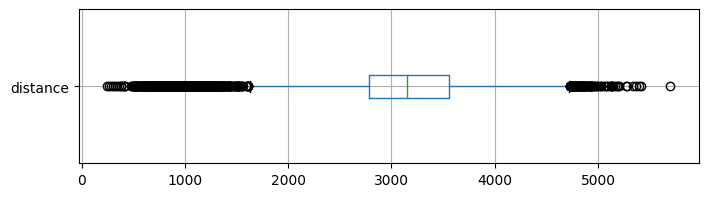

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

<AxesSubplot:>

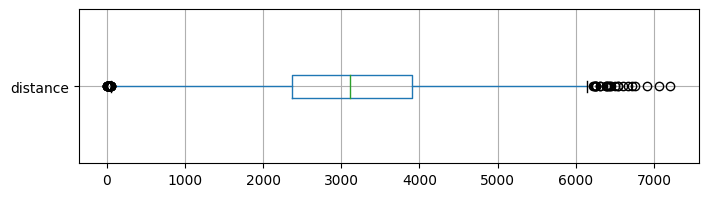

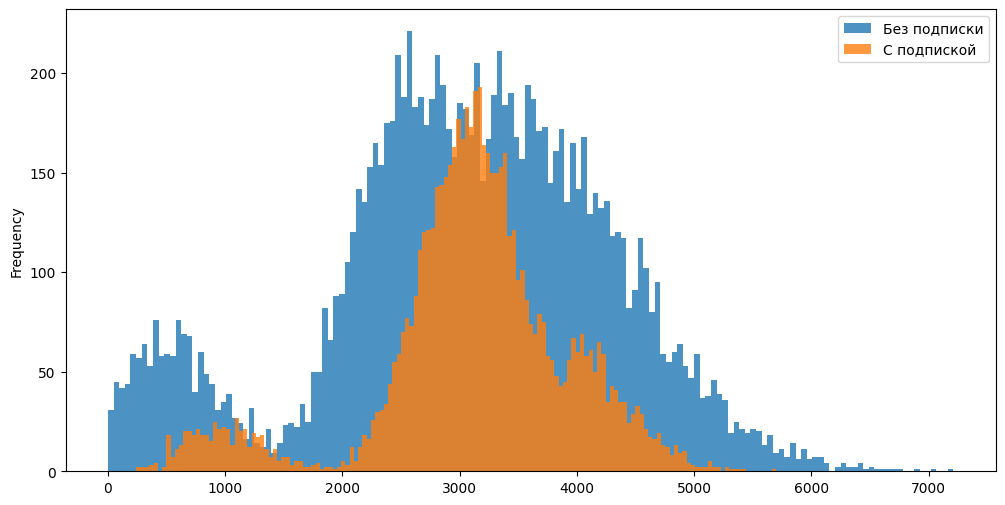

In [34]:
display(all_data_ultra['distance'].describe());
display(all_data_ultra.boxplot(column='distance', vert=False, figsize=(8,2)));
plt.show()
display(all_data_free['distance'].describe());
display(all_data_free.boxplot(column='distance', vert=False, figsize=(8,2)));
ax_hist = all_data_free.plot(y='distance', kind='hist', bins=150, figsize=(12,6), alpha=0.8, label='Без подписки');
all_data_ultra.plot(y='distance', kind='hist', bins=150, figsize=(12,6), ax=ax_hist, alpha=0.8, legend=True, label='С подпиской');

На графиках видны выбросы: 
* у пользователей без подписки в колонке с длительностью много значений равных 0.5
* диаграмма размаха показывает большое количество выбросов (значений больше 32мин) у пользователей с подпиской 
* в колонке с пройденным расстоянием у пользователей с подпиской (значения меньше 1600м и больше 4700м)
* у пользователей без подписки на графике расстояния наблюдается спад (800м-2000м)
* у пользователей с подпиской на графике расстояния также наблюдается спад (1100м-2300м)

## Подсчет выручки

### Таблица с агрегированными данными 

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Добавил столбец с округленной продолжительностью поездки в искодную таблицу. Также в таблицу с аггрегированными данными добавил значения стоимости минуты, старта поездки и подписки.

In [35]:
all_data['duration_new'] = np.ceil(all_data['duration'])
agg_data = all_data.pivot_table(index=['user_id', 'month'], values=['duration_new', 'distance', 'start_ride_price', 'minute_price', 'subscription_fee'], aggfunc=['count', 'sum', 'first'])
agg_data.columns = ['count', 'count1', 'count2', 'count3', 'count4', 'distance', 'duration', 'tmp1', 'tmp2', 'tmp3', 'tmp4', 'tmp5', 'minute_price', 'start_ride_price', 'subscription_fee']
agg_data = agg_data.drop(columns=['count1', 'count2', 'count3', 'count4','tmp1', 'tmp2', 'tmp3', 'tmp4', 'tmp5'])
agg_data.head()

count     distance  duration  minute_price  start_ride_price  \
user_id month                                                                 
1       1          2  7027.511294      42.0             6                 0   
        4          1   754.159807       7.0             6                 0   
        8          2  6723.470560      46.0             6                 0   
        10         2  5809.911100      32.0             6                 0   
        11         3  7003.499363      56.0             6                 0   

               subscription_fee  
user_id month                    
1       1                   199  
        4                   199  
        8                   199  
        10                  199  
        11                  199

### Посчет помесячной выручки каждого клиента

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Советую загружать все библиотеки в начале проекта, в отдельной ячейке. Так будет сложнее случайно удалить ячейку с загрузкой нужной библиотеки и сделать код не работающим. А получатель данного отчета сразу поймет, какие библиотеки используются и какие ему нужно установить для запуска проекта.

In [36]:
agg_data['monthly_revenue'] = agg_data['start_ride_price'] * agg_data['count'] + \
    agg_data['minute_price'] * agg_data['duration'] + agg_data['subscription_fee']
agg_data.head(20)

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0             6                 0   
        4          1    754.159807       7.0             6                 0   
        8          2   6723.470560      46.0             6                 0   
        10         2   5809.911100      32.0             6                 0   
        11         3   7003.499363      56.0             6                 0   
        12         2   6751.629942      28.0             6                 0   
2       3          3  10187.723006      63.0             6                 0   
        4          2   6164.381824      40.0             6                 0   
        6          1   3255.338202      14.0             6                 0   
        7          2   6780.722964      48.0             6                 0   
        8          1    923.007439       7.0             6                 0   
        10         1   2824.636598      19.0             6                 0   
        12         1   3828.248580      12.0             6                 0   
3       1          1   3061.777147      13.0             6                 0   
        2          2   5421.152016      39.0             6                 0   
        4          1   2956.651632      21.0             6                 0   
        5          3   9064.026918      63.0             6                 0   
        7          3  10919.595403      67.0             6                 0   
        9          1   2891.012822      23.0             6                 0   
        12         1   2593.381928      13.0             6                 0   

               subscription_fee  monthly_revenue  
user_id month                                     
1       1                   199            451.0  
        4                   199            241.0  
        8                   199            475.0  
        10                  199            391.0  
        11                  199            535.0  
        12                  199            367.0  
2       3                   199            577.0  
        4                   199            439.0  
        6                   199            283.0  
        7                   199            487.0  
        8                   199            241.0  
        10                  199            313.0  
        12                  199            271.0  
3       1                   199            277.0  
        2                   199            433.0  
        4                   199            325.0  
        5                   199            577.0  
        7                   199            601.0  
        9                   199            337.0  
        12                  199            277.0

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Округлять до следующего целого необходимо до создания таблицы с агрегированными данными. В задании написано: "Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа". Именно исходного, а не только что созданного. Округлять продолжительность каждой поездки, а не результат суммирования.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Убрал ячейки кода, со старым подсчетом помесячной выручки.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Выручки нет в таблице all_data. В таблице также должно быть количество поездок. Если добавить цены поездок и подписки в сводную таблицу в начале п. 6.2 (к ним применить, например, 'first' в aggfunc), можно в одной строке перемножить и прибавить соответствующие столбцы (как в подсказке)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Теперь верно

## Проверка гипотез

### Тратят ли ползователи с подпиской больше времени на поездки?

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Гипотезы стоит сформулировать перед тестом. А в выводе проинтерпретировать результат.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Добавил формулировку липотез перед тексто и переписал вывод.

* Нулевая гипотеза: пользователи с подпиской тратят столько же времени на поездки сколько и пользователи без подписки.
* Альтернативная гипотеза: пользователи с подпиской тратят больше времени на поездку чем пользователи без подписки.

In [37]:
alpha = .01

results = st.ttest_ind(all_data_ultra['duration'], 
                       all_data_free['duration'], 
                       alternative='greater')

display(results.pvalue)
display(results.pvalue < alpha)

1.2804098316645613e-34

True

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ На этапе 4.2 уже были созданы датафреймы c данными о пользователях без подписки и с подпиской. Вот эти выборки необходимо здесь использовать. Данные не нужно агрегировать.

Мы можем с вероятностью > 99% допустить, что скорее всего пользователи с подпиской тратят больше времени на поездку чем пользователи без подписки.

### Превышает ли среднее расстояние подписчиков 3130м?

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Добавил формулировку переде тестом, изменил подсчет результата в тесте (Результат теста изменился и вывод тоже).

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_2: <a class="tocSkip"> </h2>

Подправил гипотзы, код и вывод. 

* Нулевая гипотеза: пользователи с подпиской проезжают 3131м за 1 поездку в среднем.
* Альтернативная гипотеза: пользователи с подпиской проезжают меньше 3131м за одну поездку в среднем.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"></h2>
    
❌ Нулевая и альтернативная гипотеза пересекаются, хотя они должны быть взаимоисключающими. alternative и альтернативная гипотеза должны соответствовать.

In [38]:
mu = 3131
alpha = .05

results = st.ttest_1samp(
    all_data_ultra['distance'], 
    mu,
    alternative='less')

display(results.pvalue)

display((results.pvalue) < alpha)

0.06703136970271892

False

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Следует обратить внимание, что бизнес заинтересован в том, чтобы издержки были минимальные. Подсчитано, что 3130 метров оптимально с точки зрения износа, т.е. всё, что равно этому расстоянию или меньше вполне приемлемо. Если больше, то износ повышенный. Нужно выяснить, выходит ли за пределы оптимальности износ самокатов. Стоит переформулировать альтернативную гипотезу и скорректировать параметр alternative. И прокомментировать результаты, является ли расстояние поездок оптимальным с точки зрения износа самоката, т.е., что он в пределах нормы, не завышен.

Тест показал, что гипотезу о том что пользователи с подпиской 3130 метров нельзя отвергнуть т.к. с вероятностью 6.7% пользователь с подпиской в среднем проедет больше этого значения.  

### Будет ли помесячная выручка от пользователей с подпиской выше чем у пользователей без подписки?

Нулевая гипотеза: помесячная выручка от пользователей с подпиской равна помесячной выручке пользоваелей без подписки.
Альтернативная гипотеза: помесячная выручка от пользователей с подпиской выше помесячной выручке пользоваелей без подписки.

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Изменил формулу для t-теста и скорректировал вывод.

In [39]:
alpha = .05

results = st.ttest_ind(agg_data[agg_data['subscription_fee'] == 199]['monthly_revenue'], 
                       agg_data[agg_data['subscription_fee'] == 0]['monthly_revenue'], 
                       alternative='greater')

display(results.pvalue)
display(results.pvalue < alpha)

1.8850394384715216e-31

True

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Здесь требуется сравнить выручку с каждого пользователя по месяцам, которая уже была рассчитана в шаге "Подсчет выручки" (создан датафрейм "для каждого пользователя за каждый месяц"). Для проверки гипотез не нужно агрегировать данные. Стоит только отфильтровать выборки по ultra и free.

Мы можем с вероятностью более 99% допустить, что скорее всего помесячная выручка от пользователей с подпиской выше помесячной выручке пользоваелей без подписки.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Лучше написать менее категорично: "Нулевая гипотеза (о чем?) отвергнута, есть основания утверждать, что...". Мы можем с определенной долей вероятности допустить, что скорее всего верна соответствующая гипотеза.

### Какой тест выбрать

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Добавил значение параметра alternative для ttest_rel()

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки это гипотезы подойдет зависимый t-test для парных выборок (Dependent t-test for paired samples), который реализуется програмно функцией ttest_rel() билиотеки scipy модуля stats (параметр alternative='less'). 

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Подходит тест st.ttest_rel(). Но в задании еще написано: "Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось". Какая должна быть гипотеза, односторонняя или двухсторонняя?

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ +

## Распределения

### Подбираем такое количество промокодов, чтобы вероятность не выполнить план была не больше 5%.

In [40]:
n = 100
p = 0.1

mu = n * p
sigma = (n * p * (1 - p)) ** .5

distr = st.norm(mu, sigma) 
result = distr.cdf(99)
while result >= .05:
    n += 1
    mu = n * p

    sigma = (n * p * (1 - p)) ** .5
    distr = st.norm(mu, sigma) 
    result = distr.cdf(99)
display(result)
display(n)

0.04991937389843044

1158

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ st.norm - это нормальное распределение, а не биноминальное. Один из вариантов решения, чтобы рассчитать минимальное количество промокодов, -  в цикле выбрать какое-нибудь количество промокодов (n) и увеличивать его на единицу, пока binom.cdf не станет равным или меньше 0.05 (в аргументах функции cdf стоит указать 99, n и p). 99 выбирается, т.к. нужно найти такое минимальное значение, чтобы вероятность не выполнить план (меньше 100) была равна 0.05. 

### Считаем вероятность того, что уведомление откроют не более 399 500 пользователей.

In [41]:
n = 1000000
p = 0.4

mu = n * p
sigma = (n * p * (1 - p)) ** .5

distr = st.norm(mu, sigma) 
result = distr.cdf(399500)
display(result)

0.15371708296369768

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Верно

## Общий вывод

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Подправил общий вывод после правок.

### Предобработка данных: 

* в данных не было обнаружено пропусков.
* были обработаны дубликаты (в таблице riders_csv были найдены и удалены явные дубликаты, неявных дубликатов не было найдено)

### Исследовательский анализ данных:

* В выборке найдены аномальные данные (строки в которых длительность поездки составляет 0.5 мин, а пройденное расстояние боольше 4000м);
* исследована найдена частота встречаемости городов в данных: по Пятегорску больше всего данных (219), а по Москве меньше всего (168)
* определено соотношение пользователей с подпиской и без: пользователей с подпиской примерно 45% от всей выборки
* исследован возраст пользователей: зачатую сервисом пользуются люди от 22 до 28 лет
* найдено медианное расстояние за одну поездку (3131м) и медианное время поездок (17.8мин)
    
### Обьединение данных:

* создана таблица, обьединяющая данные всех таблиц. 
* созданы 2 дополнительные таблицы (данные о пользователях с подпиской и без)
* построены графики о расстоянии и времени поездок для пользователей обеих категорий (данные имеют выбросы)

### Подсчет выручки:

* подсчитана помесячная выручка, приносимая каждым клиентом помесячно и добавлена в общую таблицу

### Проверка гипотез:

* с вероятностью > 99% пользователи с подпиской будут тратить больше времени на поездку чем пользователи без подписки.
* тест показал, что гипотезу о том что пользователи с подпиской будут проезжать не больше 3130 метров нельзя отвергнуть т.к. с вероятностью 6.7% пользователь с подпиской в среднем проедет больше этого значения.  
* с вероятностью > 99% допускаем, что помесячная выручка от пользователей с подпиской выше помесячной выручке пользоваелей без подписки.

### Рекомендации:

* пользователи с подпиской приносят больше выручки, возможно стоит провести акцию с раздачей промокодов для пользователй без подписки, чтобы часть из них купила подписку
* стоит обратить внимание на износ самокатов, с вероятностью примерно в 6.7% пользователи с подпиской будет проезжать в среднем больше рекомендованного значения 
* если после обновления потребуется определить слизилось ли количество обращений в тех поддержку можно воспользоваться зависимым t-test для парных выборок (Dependent t-test for paired samples), который реализуется програмно функцией ttest_rel() билиотеки scipy модуля stats. 

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Вывод нужно будет обновить после внесения изменений в проекте. Также стоит резюмировать, какие пользователи - с подпиской или без подписки - являются более выгодными для сервиса аренды самокатов.

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Общий вывод по проекту v_1:</span>
    
У тебя хорошая работа! Cоблюдена структура, проделана бóльшая часть проекта, но есть замечания, которые необходимо доработать:
* пп. в 2 4, 5, 6 и 7 разделах
* итоговые выводы
   
Также добавил рекомендации по улучшению проекта. Жду проект)

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Общий вывод по проекту v_2:</span>
    
Осталось доработать:
* пп. в 5 и 7 разделах
   
Жду проект)